# Churn Prediction 

## Customer Churn Prediction:
A Bank wants to take care of customer retention for its product: savings accounts. The bank wants you to identify customers likely to churn balances below the minimum balance. You have the customers information such as age, gender, demographics along with their transactions with the bank.
### Problem Statement : 
To predict the propensity to churn for each customer.
### Data Dictionary
There are multiple variables in the dataset which can be cleanly divided into 3 categories:
### Demographic information about customers
-	customer_id - Customer id 
-	vintage - Vintage of the customer with the bank in a number of days 
-	age - Age of customer 
-	gender - Gender of customer 
-	dependents - Number of dependents 
-	occupation - Occupation of the customer 
-	city - City of the customer (anonymized)


### Customer Bank Relationship

-	customer_nw_category - Net worth of customer (3: Low 2: Medium 1: High) 
-	branch_code - Branch Code for a customer account 
-	days_since_last_transaction - No of Days Since Last Credit in Last 1 year


### Transactional Information

-	current_balance - Balance as of today 
-	previous_month_end_balance - End of Month Balance of previous month 
-	average_monthly_balance_prevQ - Average monthly balances (AMB) in Previous Quarter 
-	average_monthly_balance_prevQ2 - Average monthly balances (AMB) in previous to the previous quarter 
-	current_month_credit - Total Credit Amount current month 
-	previous_month_credit - Total Credit Amount previous month 
-	current_month_debit - Total Debit Amount current month 
-	previous_month_debit - Total Debit Amount previous month 
-	current_month_balance - Average Balance of current month 
-	previous_month_balance - Average Balance of previous month 
-	churn - Average balance of customer falls below minimum balance in the next quarter (1/0) 


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('churn_prediction.csv')

In [6]:
data.shape

(28382, 21)

In [7]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


# Data Exploration

In [8]:
data.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [9]:
data.describe(include = 'all')

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,27857,25919.000000,28302,27579.000000,28382.000000,28382.000000,25159.000000,...,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
unique,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Male,NaN,self_employed,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,16548,NaN,17476,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15143.508667,2364.336446,48.208336,NaN,0.347236,NaN,796.109576,2.225530,925.975019,69.997814,...,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,NaN,0.997661,NaN,432.872102,0.660443,937.799129,86.341098,...,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,NaN,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,...,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,NaN,0.000000,NaN,409.000000,2.000000,176.000000,11.000000,...,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,NaN,0.000000,NaN,834.000000,2.000000,572.000000,30.000000,...,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,NaN,0.000000,NaN,1096.000000,3.000000,1440.000000,95.000000,...,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000


In [10]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [11]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

# Univariate Ananlysis

In [12]:
for col in data.columns:
    print(col)

customer_id
vintage
age
gender
dependents
occupation
city
customer_nw_category
branch_code
days_since_last_transaction
current_balance
previous_month_end_balance
average_monthly_balance_prevQ
average_monthly_balance_prevQ2
current_month_credit
previous_month_credit
current_month_debit
previous_month_debit
current_month_balance
previous_month_balance
churn


In [13]:
data["churn"].value_counts()/len(data)

0    0.814671
1    0.185329
Name: churn, dtype: float64

### Observation
1. It is a highly imbalanced dataset.
2. 81.5% people did not fall below the required minimum balance.
3. 18.5% people did fall below under the reqiured mimum average balance.

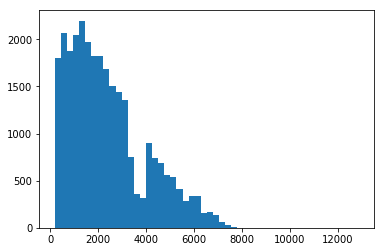

In [14]:
x = data["vintage"]
plt.hist(x, bins = 50)
plt.show()

### Observation
1. It is rightskewed curve.
2. As the values below 8000 are very very less hence they caan be discarded.
3. This can be made into a gaussian distribution by takin the log ofvalues.

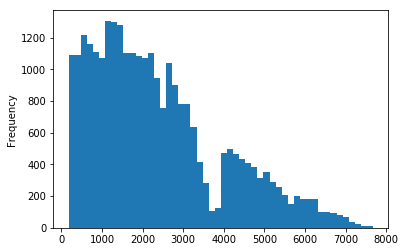

In [15]:
(data['vintage'].loc[data['vintage']<8000]).plot.hist(bins=50)

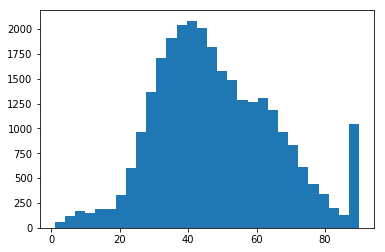

In [16]:
x = data["age"]
plt.hist(x, bins = 30)
plt.show()

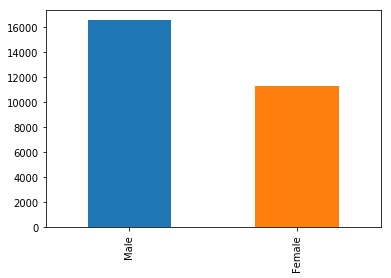

In [17]:
data['gender'].value_counts().plot(kind = 'bar')

#### Observation
1. Majority of the customers were males.


In [18]:
print(data["dependents"].mean())
print(max(data["dependents"]))
print(min(data["dependents"]))

0.34723561865812724
52.0
0.0


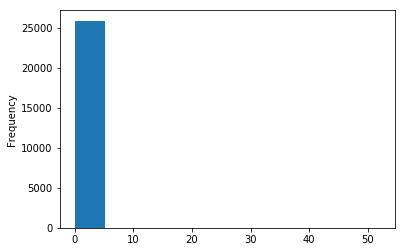

In [19]:
(data["dependents"]).plot.hist()

In [20]:
(data["dependents"].value_counts()/len(data))*100

0.0     75.523219
2.0      7.575224
1.0      4.915087
3.0      2.469875
4.0      0.630681
5.0      0.144458
6.0      0.028187
7.0      0.010570
36.0     0.003523
52.0     0.003523
25.0     0.003523
9.0      0.003523
50.0     0.003523
32.0     0.003523
8.0      0.003523
Name: dependents, dtype: float64

#### Observation
1. Maximum number of customers have 0 dependents.
2. This can be converted into catergorica variable by combinig rows where number of dependents are more than 3.

In [21]:
(data["occupation"].value_counts()/len(data))*100

self_employed    61.574237
salaried         23.620605
student           7.251075
retired           7.131280
company           0.140934
Name: occupation, dtype: float64

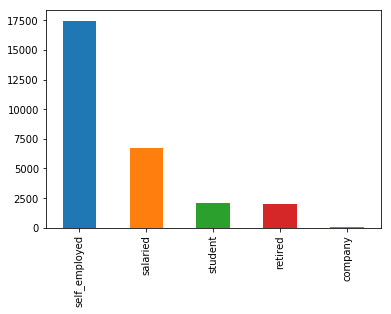

In [22]:
data['occupation'].value_counts().plot(kind = 'bar')

#### Observation
1. Maximum number of people are self employed.
2. very less number of people own a company.

In [23]:
data['customer_nw_category'].value_counts()/len(data)

2    0.512966
3    0.356282
1    0.130752
Name: customer_nw_category, dtype: float64

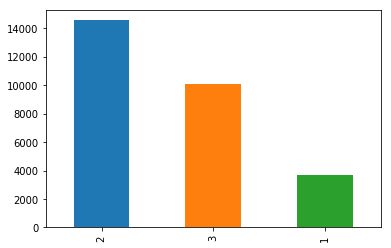

In [24]:
data['customer_nw_category'].value_counts().plot(kind = 'bar')

#### Observation
1. 3: Low 2: Medium 1: High
2. Maximum number of people have income in the category of medium.

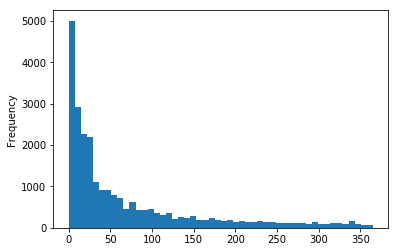

In [25]:
(data["days_since_last_transaction"]).plot.hist(bins = 50)

In [26]:
data["days_since_last_transaction"].describe()

count    25159.000000
mean        69.997814
std         86.341098
min          0.000000
25%         11.000000
50%         30.000000
75%         95.000000
max        365.000000
Name: days_since_last_transaction, dtype: float64

#### Observation
1. It is a right skewed curve.
2. Most of the people have done atleast a transaction within 150 days.

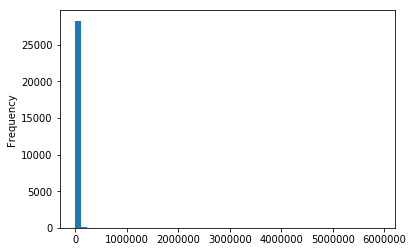

In [27]:
(data["current_balance"]).plot.hist(bins = 50)

In [28]:
data["current_balance"].describe()

count    2.838200e+04
mean     7.380552e+03
std      4.259871e+04
min     -5.503960e+03
25%      1.784470e+03
50%      3.281255e+03
75%      6.635820e+03
max      5.905904e+06
Name: current_balance, dtype: float64

#### Observation
1. Minimum current balance is 55039
2. Maimum people have a positive balance.


In [29]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

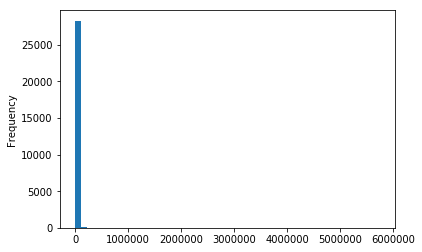

In [30]:
(data["previous_month_end_balance"]).plot.hist( bins = 50)

In [31]:
data["previous_month_end_balance"].describe()

count    2.838200e+04
mean     7.495771e+03
std      4.252935e+04
min     -3.149570e+03
25%      1.906000e+03
50%      3.379915e+03
75%      6.656535e+03
max      5.740439e+06
Name: previous_month_end_balance, dtype: float64

#### Observation
1. distribution of previous mont's end balance and their currenet balace are very similar.
2. Very less number of people have balance above 10000
3. There are some people who have monthly balance lower than 0.

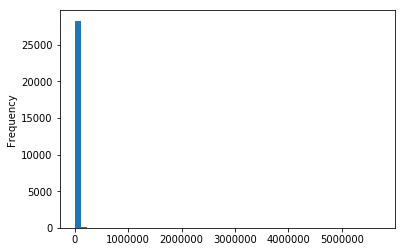

In [32]:
(data["average_monthly_balance_prevQ"]).plot.hist( bins = 50)

In [33]:
data["average_monthly_balance_prevQ"].describe()

count    2.838200e+04
mean     7.496780e+03
std      4.172622e+04
min      1.428690e+03
25%      2.180945e+03
50%      3.542865e+03
75%      6.666887e+03
max      5.700290e+06
Name: average_monthly_balance_prevQ, dtype: float64

#### Observation
1. Avergare balance in the previous quater has not changed much as the observations are very similar.
2. Here  the minimum balance is not below 0.
3. Condition of monthly balance maintainence has degraded in the las quater.

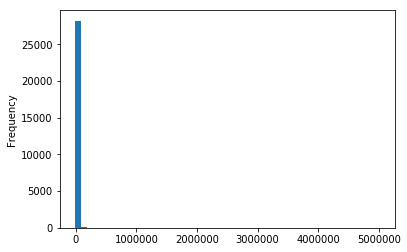

In [34]:
(data["average_monthly_balance_prevQ2"]).plot.hist( bins = 50)

In [35]:
data["average_monthly_balance_prevQ2"].describe()

count    2.838200e+04
mean     7.124209e+03
std      4.457581e+04
min     -1.650610e+04
25%      1.832507e+03
50%      3.359600e+03
75%      6.517960e+03
max      5.010170e+06
Name: average_monthly_balance_prevQ2, dtype: float64

#### Observation 
1. Mean of balance have incerased from second last quater to the last quater.
2. Some did have a negative balance in the second last quater.
3. There are no missing values.
4. All the other observations are similar to the last quater.

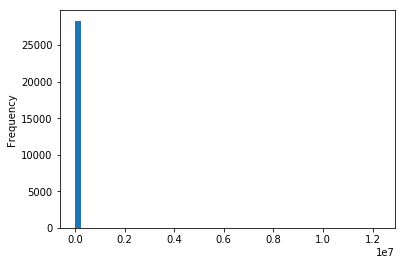

In [36]:
(data["current_month_credit"]).plot.hist( bins = 50)

In [37]:
data["current_month_credit"].describe()

count    2.838200e+04
mean     3.433252e+03
std      7.707145e+04
min      1.000000e-02
25%      3.100000e-01
50%      6.100000e-01
75%      7.072725e+02
max      1.226985e+07
Name: current_month_credit, dtype: float64

In [38]:
d = data[data["current_month_credit"]>1000000]
print(d)

       customer_id  vintage  age  gender  dependents     occupation    city  \
7787          8295     2895   51    Male         0.0  self_employed  1232.0   
12218        13047     3882   51    Male         0.0  self_employed  1020.0   
13012        13895     2903   55  Female         0.0  self_employed  1534.0   
24095        25712     1192   90    Male         0.0        retired  1020.0   

       customer_nw_category  branch_code  days_since_last_transaction  ...    \
7787                      1            7                          4.0  ...     
12218                     1           60                          7.0  ...     
13012                     2           63                         11.0  ...     
24095                     2            5                         18.0  ...     

       previous_month_end_balance  average_monthly_balance_prevQ  \
7787                    206014.78                      284779.02   
12218                   356602.22                      170440.29   

#### Observation
1. Majority of peopple have not credited any amount int the current month.
2. 50% of people have debited their account in the current month.
3. only 128 people have current month credit more than 1 lakh.

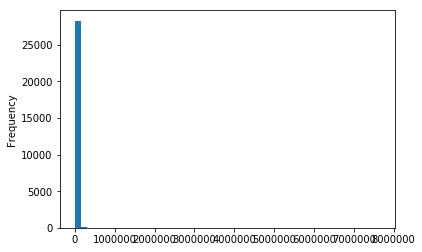

In [39]:
(data["current_month_debit"]).plot.hist( bins = 50)

In [40]:
data["current_month_debit"].describe()

count    2.838200e+04
mean     3.658745e+03
std      5.198542e+04
min      1.000000e-02
25%      4.100000e-01
50%      9.193000e+01
75%      1.360435e+03
max      7.637857e+06
Name: current_month_debit, dtype: float64

#### Observation
1. 

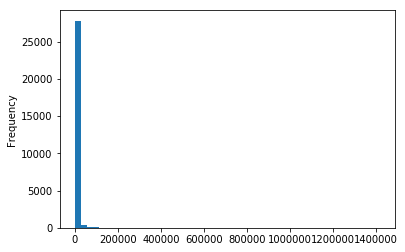

In [41]:
(data["previous_month_debit"]).plot.hist( bins = 50)

In [42]:
(data["previous_month_debit"]).describe()

count    2.838200e+04
mean     3.339761e+03
std      2.430111e+04
min      1.000000e-02
25%      4.100000e-01
50%      1.099600e+02
75%      1.357553e+03
max      1.414168e+06
Name: previous_month_debit, dtype: float64

#### Obsservation
1.

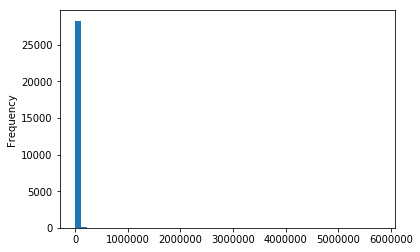

In [43]:
(data["current_month_balance"]).plot.hist( bins = 50)

In [44]:
print(data["current_month_balance"].describe())
print(data["current_balance"].describe())

count    2.838200e+04
mean     7.451133e+03
std      4.203394e+04
min     -3.374180e+03
25%      1.996765e+03
50%      3.447995e+03
75%      6.667958e+03
max      5.778185e+06
Name: current_month_balance, dtype: float64
count    2.838200e+04
mean     7.380552e+03
std      4.259871e+04
min     -5.503960e+03
25%      1.784470e+03
50%      3.281255e+03
75%      6.635820e+03
max      5.905904e+06
Name: current_balance, dtype: float64


#### Observation
1. minimum current month balance was 3374
2. Very less deviation is obsered in current balanace and current month balance.

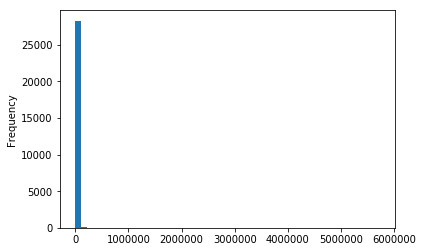

In [45]:
(data["previous_month_balance"]).plot.hist( bins = 50)

In [46]:
(data["previous_month_balance"]).describe()

count    2.838200e+04
mean     7.495177e+03
std      4.243198e+04
min     -5.171920e+03
25%      2.074408e+03
50%      3.465235e+03
75%      6.654693e+03
max      5.720144e+06
Name: previous_month_balance, dtype: float64

#### Observation
1. Highly right skewed curve.
2. Least amount of balance was negative 51719.

# DATA MANIPULATION and FEATURE ENGINEERING
1. DROPING DUPLPIATE ROWS
2. FILLING MISSING VALUES 
3. COORECTING DATA TYPE
4. CORRECTING SPELLING MISTAKES

In [47]:
data.drop_duplicates().head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [48]:
data.shape

(28382, 21)

#### Observation 
- There weere no duplicate rows as the shape did not change 

In [49]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [50]:
data["gender"].mode()

0    Male
dtype: object

In [51]:
data['gender'].fillna(value = (data['gender'].mode()[0]),inplace=True)

In [52]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                               0
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [53]:
data["dependents"].mean()

0.34723561865812724

In [54]:
data['dependents'].fillna(value = (data['dependents'].mean()),inplace=True)

In [55]:
data["occupation"].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [56]:
data['occupation'].fillna(value = (data['occupation'].mode()[0]),inplace=True)

In [57]:
data['city'].fillna(value = (data['city'].mean()),inplace=True)

In [58]:
data['days_since_last_transaction'].fillna(value = (data['days_since_last_transaction'].mean()),inplace=True)

In [59]:
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

#### RESULT
- Now, there are no missin values in the datset.


In [60]:
# dropping the rows where the value of dependents is more than 7

data.drop(data[data["dependents"]>7].index, axis=0, inplace=True)

In [61]:
data.shape

(28375, 21)

#### Result 
- Earlier there were 28382 rows now there are 28375 rows so rest of the oulier rows have been removed 

# BI-VARIATE ANALYSIS

### Problem Statement : 
To predict the propensity to churn for each customer.
### Data Dictionary
There are multiple variables in the dataset which can be cleanly divided into 3 categories:
### Demographic information about customers
-	customer_id - Customer id 
-	vintage - Vintage of the customer with the bank in a number of days 
-	age - Age of customer 
-	gender - Gender of customer 
-	dependents - Number of dependents 
-	occupation - Occupation of the customer 
-	city - City of the customer (anonymized)


### Customer Bank Relationship

-	customer_nw_category - Net worth of customer (3: Low 2: Medium 1: High) 
-	branch_code - Branch Code for a customer account 
-	days_since_last_transaction - No of Days Since Last Credit in Last 1 year


### Transactional Information

-	current_balance - Balance as of today 
-	previous_month_end_balance - End of Month Balance of previous month 
-	average_monthly_balance_prevQ - Average monthly balances (AMB) in Previous Quarter 
-	average_monthly_balance_prevQ2 - Average monthly balances (AMB) in previous to the previous quarter 
-	current_month_credit - Total Credit Amount current month 
-	previous_month_credit - Total Credit Amount previous month 
-	current_month_debit - Total Debit Amount current month 
-	previous_month_debit - Total Debit Amount previous month 
-	current_month_balance - Average Balance of current month 
-	previous_month_balance - Average Balance of previous month 
-	churn - Average balance of customer falls below minimum balance in the next quarter (1/0) 


## HYPOTHESIS GENERATION
- Occupation will paly a major role in determining if the cutomer will churn or not.
- A customer will churn or not will most likely depend on the net income category of the customer.
- Days since lasst transacion can also be an important factor as people who havent done transaction in a long time may churn.
- People with negative balance are moroe likely to churn.
- Average balance of previous both quaters can play an important role in determing the financial potential of the customer hence it will also help for finding if he churns or not.


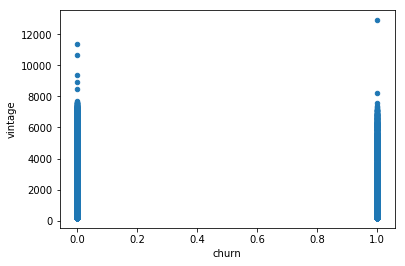

In [62]:
data.plot.scatter('churn','vintage')

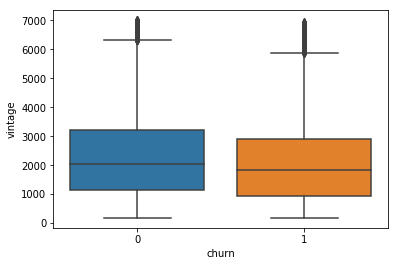

In [71]:
sns.boxplot(x='churn',y='vintage', data= data)
plt.show()

In [72]:
# As the data is highly overlaed so it difficult to determine usong churn. Butthere are some outliers that should be removed.

In [73]:
data.drop(data[data["vintage"]>7000].index, axis=0, inplace=True)

In [74]:
data.shape

(28253, 26)

C:\Users\Dell\Anaconda3\anaconda\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


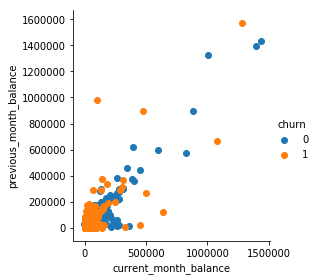

In [75]:
sns.FacetGrid(data, hue="churn",size = 4).map(plt.scatter, "current_month_balance", "previous_month_balance").add_legend() 
plt.show()

In [76]:
data.drop(data[data["current_month_balance"]>5000000].index, axis=0, inplace=True)

In [77]:
data.shape

(28253, 26)

In [78]:
# applying .get dummies
data = pd.get_dummies(data)

# Making a logistic regression model

In [79]:
# importing the standard scaler function from skleaar.preprocessing
from sklearn.preprocessing import StandardScaler

In [80]:
# creating an instance for the standard sclaer function
scale = StandardScaler()

In [82]:
#fting the data in the scaler instance

sc_data = scale.fit(data)

In [83]:
#  train valiadtion split
x = data.drop(['churn'],axis = 1)
y = data['churn']

In [84]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y= train_test_split(x, y, test_size = 0.3, random_state=1)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, auc
from sklearn.metrics import roc_auc_score

In [87]:
# creating aan instance class for logistic regression and fitting the trining data  
logreg = LogisticRegression()
logreg.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [88]:
pred_train = logreg.predict_proba(train_x)
pred_valid = logreg.predict_proba(valid_x)

In [89]:
roc_auc_score(train_y, pred_train[:,1])

0.7258928458105176

In [90]:
roc_auc_score(valid_y, pred_valid[:,1])

0.7141243486572738